In [1]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)

import random
import time
import pickle

import sys
sys.path.append("../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
with open('../data/pickle/20221010v2_30y.pickle', mode='rb') as f:
    England = pickle.load(f)

In [3]:
#England = ProSoccerLeague(name="england", leagues=[L1, L2, L3])
all_member = pd.DataFrame()
for l in England.leagues:
    for t in l.teams:
        for p in t.affilation_players:
            buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "現役"]]), 
                                columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ", "pac", "sho", "pas", "dri", "def", "phy", "進退"])
            all_member = pd.concat([all_member, buff])
for p in England.retire_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "引退"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])

for p in England.free_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate,  p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "フリー"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])
all_member = all_member.reset_index(drop=True)

In [27]:
output = England.players_result

## Rateの分布

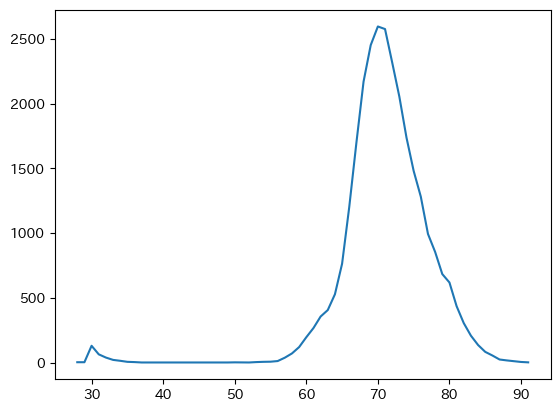

In [5]:
rate_list = output["Rate"].unique()
rate_list.sort()
rate_num = []
for rate in rate_list:
    rate_num.append(len(output.groupby("Rate").get_group(rate).groupby("uuid").mean()))
plt.plot(rate_list, rate_num)

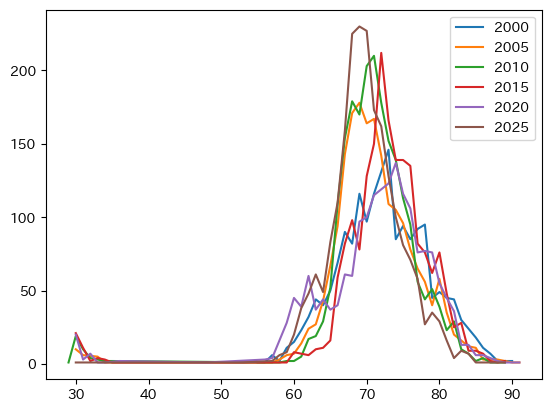

In [39]:
for i in range(2000, 2030, 5):
    output_ = output[output["年度"]==i]
    rate_list = output_["Rate"].unique()
    rate_list.sort()
    rate_num = []
    for rate in rate_list:
        rate_num.append(len(output_.groupby("Rate").get_group(rate).groupby("uuid").mean()))
    plt.plot(rate_list, rate_num, label=i)
plt.legend()
plt.show()

## 18歳のRate

In [7]:
output[output["年齢"]==18]["Rate"].value_counts(), len(output[output["年齢"]==18])

(68    1668
 69    1506
 67    1340
 70    1206
 66     946
 71     654
 65     524
 72     348
 64     276
 63     160
 73     152
 60     140
 62     136
 61     132
 59      86
 74      76
 58      52
 75      46
 57      34
 76      30
 56      14
 77      10
 79       6
 78       4
 Name: Rate, dtype: int64,
 9546)

## 怪我割合

In [8]:
print(output["怪我欠場"].sum()/3/20/30)
print(output[output["試合数"]>0]["怪我欠場"].value_counts())

100.41000000000001
0     38243
1      3255
2      1690
3      1538
5      1386
4      1385
6      1224
7      1054
8       989
9       956
10      846
11      740
12      687
13      661
14      609
15      487
16      466
17      410
18      355
19      301
20      279
21      231
22      207
23      180
24      165
26      124
25      116
27      101
28       81
29       68
30       56
32       53
31       47
34       29
35       27
33       22
36       13
37        9
Name: 怪我欠場, dtype: int64


## 90以上の人数

In [9]:
output[output["Rate"]>89].groupby("uuid").mean()

,年齢,Rate,残契約,年度,試合数,goal,assist,CS,怪我欠場
uuid,,,,,,,,,
1e0269da-486e-11ed-b4c6-b1071dd11c3e,29.5,90.000000,0.500000,2000.5,15.500000,0.500,0.75,5.750000,6.000
1e02c524-486e-11ed-b4c6-b1071dd11c3e,28.0,90.000000,0.571429,2005.0,20.714286,0.000,0.00,10.500000,0.000
1e07b854-486e-11ed-b4c6-b1071dd11c3e,28.5,90.000000,1.000000,2001.5,19.625000,0.625,0.50,11.500000,0.875
1e55da66-486e-11ed-b4c6-b1071dd11c3e,28.5,90.833333,0.500000,2004.5,21.083333,0.000,0.00,9.166667,0.000
49023858-486f-11ed-b4c6-b1071dd11c3e,27.0,90.000000,1.400000,2019.0,15.800000,0.800,0.50,7.000000,5.500
89a471aa-486f-11ed-b4c6-b1071dd11c3e,27.5,91.000000,0.666667,2021.5,21.000000,0.000,0.00,12.083333,0.000


## チーム能力

In [10]:
for t in England.leagues[0].teams:
    print(t.name, t.formation.team_rate)

Shrewsbury {'ATT': 85.0, 'MID': 77.4, 'DEF': 74.75, 'GK': 87, 'ALL': 78.0}
Swansea {'ATT': 77.33333333333333, 'MID': 80.33333333333333, 'DEF': 77.75, 'GK': 81, 'ALL': 78.63636363636364}
Cardiff {'ATT': 77.0, 'MID': 75.0, 'DEF': 78.5, 'GK': 81, 'ALL': 77.18181818181819}
Montevideo {'ATT': 80.33333333333333, 'MID': 80.33333333333333, 'DEF': 81.0, 'GK': 84, 'ALL': 80.9090909090909}
Buenos Aires {'ATT': 77.5, 'MID': 74.75, 'DEF': 76.5, 'GK': 80, 'ALL': 76.36363636363636}
Milan {'ATT': 72.33333333333333, 'MID': 75.66666666666667, 'DEF': 68.75, 'GK': 79, 'ALL': 72.54545454545455}
Birmingham {'ATT': 78.33333333333333, 'MID': 71.0, 'DEF': 79.0, 'GK': 76, 'ALL': 75.63636363636364}
Southampton {'ATT': 79.5, 'MID': 74.75, 'DEF': 74.75, 'GK': 82, 'ALL': 76.27272727272727}
Liverpool {'ATT': 78.33333333333333, 'MID': 77.33333333333333, 'DEF': 78.5, 'GK': 83, 'ALL': 78.54545454545455}
Belfast {'ATT': 83.33333333333333, 'MID': 73.0, 'DEF': 84.0, 'GK': 83, 'ALL': 79.72727272727273}
Brussels {'ATT': 75.

## 引退年齢

In [11]:
all_member[(all_member["進退"]=="引退")].value_counts("年齢").sort_index()

年齢
23    506
24     66
25     67
26     88
27    177
28    113
29    117
30    160
31    245
32    410
33    602
34    645
35    597
36    437
37    275
38    129
39     44
40     11
42      1
dtype: int64

## 成長タイプ

In [20]:
all_member["成長タイプ"].value_counts()

general    4726
grass      1433
genius      645
legend      297
Name: 成長タイプ, dtype: int64

In [24]:
all_member[all_member["成長タイプ"]=="legend"].sort_values("年齢", ascending=False)

,名前,チーム,リーグ,uuid,年齢,生まれ年,ポジション,Rate,成長タイプ,pac,sho,pas,dri,def,phy,進退
2597,Moishe,Geneva,EFL,1e20f152-486e-11ed-b4c6-b1071dd11c3e,39,1982,ST,74,legend,72,73,54,67,35,60,引退
2144,Dorsey,Geneva,EFL,1e2e2b7e-486e-11ed-b4c6-b1071dd11c3e,38,1982,LW,73,legend,74,58,77,68,45,69,引退
1846,Wandell,Geneva,EFL,1ec2da9e-486e-11ed-b4c6-b1071dd11c3e,37,1982,CAM,73,legend,56,72,73,73,46,67,引退
5281,Kennth,Geneva,EFL,c6a5e13e-486e-11ed-b4c6-b1071dd11c3e,37,1987,CB,77,legend,74,37,67,71,75,74,引退
2585,Lute,Geneva,EFL,1e4346bc-486e-11ed-b4c6-b1071dd11c3e,37,1982,CDM,76,legend,63,51,75,75,77,66,引退
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Abraham,Geneva,EFL,b4fbbb7c-4871-11ed-b4c6-b1071dd11c3e,19,2010,RW,67,legend,67,58,62,67,31,52,フリー
6570,Jerrol,Geneva,EFL,b4f90594-4871-11ed-b4c6-b1071dd11c3e,19,2010,ST,66,legend,64,65,67,58,32,57,フリー
6971,Chancellor,Geneva,EFL,b4f01948-4871-11ed-b4c6-b1071dd11c3e,19,2010,ST,66,legend,50,66,62,61,35,66,フリー
352,Nour,Gentilly,premier,d623a81e-4871-11ed-b4c6-b1071dd11c3e,18,2011,ST,64,legend,60,62,61,57,25,62,現役


In [28]:
buff = output[output["分類"]=="練習リーグ"]
buff[buff["Rate"]>68].head(20)

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
7209,Mika,1f0fab26-486e-11ed-b4c6-b1071dd11c3e,24,69,0,CM,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
7227,Geno,1e904048-486e-11ed-b4c6-b1071dd11c3e,23,69,0,CB,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
7233,Loy,1e8f76d6-486e-11ed-b4c6-b1071dd11c3e,19,69,0,CM,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
7246,Raiford,1e1945a6-486e-11ed-b4c6-b1071dd11c3e,25,70,0,CDM,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
7248,Love,1f2491d0-486e-11ed-b4c6-b1071dd11c3e,23,69,0,CB,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
33662,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,19,69,0,ST,practice_league,2008,practice_team,練習リーグ,記録なし,20,0,0,0,0,
37576,Jvon,6e512304-486e-11ed-b4c6-b1071dd11c3e,24,69,0,LW,practice_league,2009,practice_team,練習リーグ,記録なし,20,0,0,0,0,
37592,Delwyn,067f2dd8-486f-11ed-b4c6-b1071dd11c3e,19,69,0,ST,practice_league,2009,practice_team,練習リーグ,記録なし,20,0,0,0,0,
37595,Billy,c69f7bd2-486e-11ed-b4c6-b1071dd11c3e,21,69,0,ST,practice_league,2009,practice_team,練習リーグ,記録なし,20,0,0,0,0,
37615,Jagdeep,a87a3e62-486e-11ed-b4c6-b1071dd11c3e,22,69,0,LW,practice_league,2009,practice_team,練習リーグ,記録なし,20,0,0,0,0,


,名前,年齢,生まれ年,成長タイプ
5240,Mancel,34,1989,general


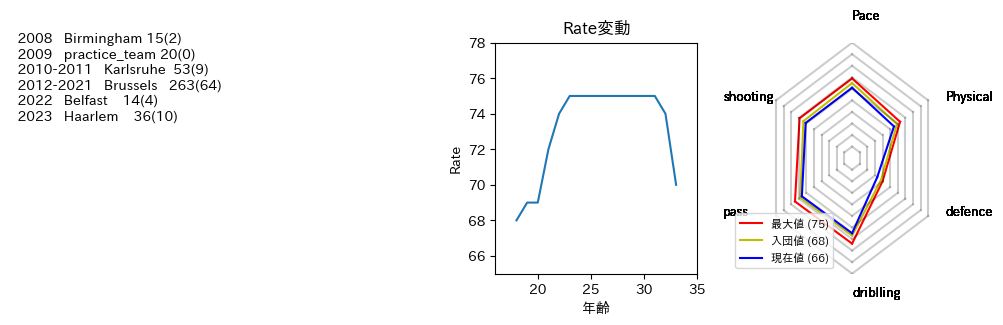

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
30920,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,18,68,3,LM,premier,2008,Birmingham,リーグ,17位,15,2,1,3,0,
37625,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,19,69,0,CAM,practice_league,2009,practice_team,練習リーグ,記録なし,20,0,0,0,0,
40350,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,20,69,3,RW,EFL,2010,Karlsruhe,リーグ,13位,21,4,2,2,8,
44277,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,21,72,2,CM,EFL,2011,Karlsruhe,リーグ,16位,31,4,4,3,9,
47092,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,22,74,3,LM,championship,2012,Brussels,リーグ,9位,15,5,2,7,0,
50815,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,23,75,2,CAM,championship,2013,Brussels,リーグ,1位,30,8,6,12,9,
54402,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,24,75,1,CAM,premier,2014,Brussels,リーグ,19位,17,2,1,2,23,
59262,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,25,75,0,CAM,championship,2015,Brussels,リーグ,10位,36,9,6,7,3,
62741,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,26,75,2,CAM,championship,2016,Brussels,リーグ,14位,20,7,2,5,20,
66263,Mancel,0683dca2-486f-11ed-b4c6-b1071dd11c3e,27,75,1,CAM,championship,2017,Brussels,リーグ,6位,26,6,1,5,14,


In [32]:
uuid_ = "0683dca2-486f-11ed-b4c6-b1071dd11c3e"
print_player(England, all_member, uuid_)

In [15]:
p = search_player(England, all_member, uuid_)

In [16]:
p.shooting_exp

2.5999999999999996

In [17]:
p.shooting_initial

66

In [18]:
output

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
0,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,18,68,4,None,premier,2007,Budapest,リーグ,16位,0,0,0,0,0,
1,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,18,68,4,None,premier,2007,Budapest,カップ戦,16位,0,0,0,0,0,
2,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,19,69,0,ST,practice_league,2008,practice_team,練習リーグ,記録なし,20,0,0,0,0,
3,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,20,69,4,None,EFL,2009,Rotterdam,リーグ,20位,0,0,0,0,0,
4,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,20,69,4,None,EFL,2009,Rotterdam,カップ戦,20位,0,0,0,0,0,
5,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,21,71,3,ST,EFL,2010,Rotterdam,リーグ,20位,16,3,1,0,0,
6,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,21,71,3,ST,EFL,2010,Rotterdam,カップ戦,20位,0,0,0,0,0,
7,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,22,72,2,ST,EFL,2011,Rotterdam,リーグ,10位,38,14,6,5,0,
8,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,22,72,2,ST,EFL,2011,Rotterdam,カップ戦,10位,1,0,0,0,0,
9,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,23,74,2,None,championship,2012,Portsmouth,リーグ,8位,0,0,0,0,0,
